#### 環境設定

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('finance_dataset.csv')
df

,Date,High,Low,Open,Close
0,1965-01-05,1.163391e+05,1.163391e+05,1.163391e+05,1.163391e+05
1,1965-01-06,1.169191e+05,1.169191e+05,1.169191e+05,1.169191e+05
2,1965-01-07,1.178700e+05,1.178700e+05,1.178700e+05,1.178700e+05
3,1965-01-08,1.189948e+05,1.189948e+05,1.189948e+05,1.189948e+05
4,1965-01-12,1.191900e+05,1.191900e+05,1.191900e+05,1.191900e+05
...,...,...,...,...,...
13962,2021-10-15,2.690117e+06,2.657175e+06,2.662822e+06,2.688848e+06
13963,2021-10-18,2.695851e+06,2.675507e+06,2.691178e+06,2.684855e+06
13964,2021-10-19,2.707705e+06,2.689472e+06,2.693348e+06,2.702436e+06
13965,2021-10-20,2.727743e+06,2.703065e+06,2.718200e+06,2.706138e+06


### データ整形

データ型確認

In [4]:
df.dtypes

Date      object
High     float64
Low      float64
Open     float64
Close    float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13967 entries, 0 to 13966
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    13967 non-null  object 
 1   High    13967 non-null  float64
 2   Low     13967 non-null  float64
 3   Open    13967 non-null  float64
 4   Close   13967 non-null  float64
dtypes: float64(4), object(1)
memory usage: 545.7+ KB


Dataのデータ型を'datetime型'へ変更

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df.dtypes

Date     datetime64[ns]
High            float64
Low             float64
Open            float64
Close           float64
dtype: object

曜日情報を取得する(月曜：0,火曜：1,水曜：2,木曜：3,金曜：4)

In [8]:
df['weekday'] = df['Date'].dt.weekday

In [9]:
df.head()

,Date,High,Low,Open,Close,weekday
0,1965-01-05,116339.097290,116339.097290,116339.097290,116339.097290,1
1,1965-01-06,116919.074097,116919.074097,116919.074097,116919.074097,2
2,1965-01-07,117869.976807,117869.976807,117869.976807,117869.976807,3
3,1965-01-08,118994.779968,118994.779968,118994.779968,118994.779968,4
4,1965-01-12,119189.953613,119189.953613,119189.953613,119189.953613,1


初めの月曜日となる1965/1/4を基準にして週を追加する

In [10]:
from datetime import datetime
from datetime import timedelta

start = datetime(1965,1,4)
df['weeks'] = (df['Date'] - start) // timedelta(weeks=1)
df

,Date,High,Low,Open,Close,weekday,weeks
0,1965-01-05,1.163391e+05,1.163391e+05,1.163391e+05,1.163391e+05,1,0
1,1965-01-06,1.169191e+05,1.169191e+05,1.169191e+05,1.169191e+05,2,0
2,1965-01-07,1.178700e+05,1.178700e+05,1.178700e+05,1.178700e+05,3,0
3,1965-01-08,1.189948e+05,1.189948e+05,1.189948e+05,1.189948e+05,4,0
4,1965-01-12,1.191900e+05,1.191900e+05,1.191900e+05,1.191900e+05,1,1
...,...,...,...,...,...,...,...
13962,2021-10-15,2.690117e+06,2.657175e+06,2.662822e+06,2.688848e+06,4,2962
13963,2021-10-18,2.695851e+06,2.675507e+06,2.691178e+06,2.684855e+06,0,2963
13964,2021-10-19,2.707705e+06,2.689472e+06,2.693348e+06,2.702436e+06,1,2963
13965,2021-10-20,2.727743e+06,2.703065e+06,2.718200e+06,2.706138e+06,2,2963


カラムの並び替え

In [11]:
df = df[['Date', 'weeks', 'weekday', 'High', 'Low', 'Open', 'Close']]
df

,Date,weeks,weekday,High,Low,Open,Close
0,1965-01-05,0,1,1.163391e+05,1.163391e+05,1.163391e+05,1.163391e+05
1,1965-01-06,0,2,1.169191e+05,1.169191e+05,1.169191e+05,1.169191e+05
2,1965-01-07,0,3,1.178700e+05,1.178700e+05,1.178700e+05,1.178700e+05
3,1965-01-08,0,4,1.189948e+05,1.189948e+05,1.189948e+05,1.189948e+05
4,1965-01-12,1,1,1.191900e+05,1.191900e+05,1.191900e+05,1.191900e+05
...,...,...,...,...,...,...,...
13962,2021-10-15,2962,4,2.690117e+06,2.657175e+06,2.662822e+06,2.688848e+06
13963,2021-10-18,2963,0,2.695851e+06,2.675507e+06,2.691178e+06,2.684855e+06
13964,2021-10-19,2963,1,2.707705e+06,2.689472e+06,2.693348e+06,2.702436e+06
13965,2021-10-20,2963,2,2.727743e+06,2.703065e+06,2.718200e+06,2.706138e+06


日付をインデックスに設定する

In [12]:
df.set_index(keys='Date', inplace = True)
df

,weeks,weekday,High,Low,Open,Close
Date,,,,,,
1965-01-05,0,1,1.163391e+05,1.163391e+05,1.163391e+05,1.163391e+05
1965-01-06,0,2,1.169191e+05,1.169191e+05,1.169191e+05,1.169191e+05
1965-01-07,0,3,1.178700e+05,1.178700e+05,1.178700e+05,1.178700e+05
1965-01-08,0,4,1.189948e+05,1.189948e+05,1.189948e+05,1.189948e+05
1965-01-12,1,1,1.191900e+05,1.191900e+05,1.191900e+05,1.191900e+05
...,...,...,...,...,...,...
2021-10-15,2962,4,2.690117e+06,2.657175e+06,2.662822e+06,2.688848e+06
2021-10-18,2963,0,2.695851e+06,2.675507e+06,2.691178e+06,2.684855e+06
2021-10-19,2963,1,2.707705e+06,2.689472e+06,2.693348e+06,2.702436e+06


データを日付順に並び替える

In [13]:
df.sort_values(by='Date')

,weeks,weekday,High,Low,Open,Close
Date,,,,,,
1965-01-05,0,1,1.163391e+05,1.163391e+05,1.163391e+05,1.163391e+05
1965-01-06,0,2,1.169191e+05,1.169191e+05,1.169191e+05,1.169191e+05
1965-01-07,0,3,1.178700e+05,1.178700e+05,1.178700e+05,1.178700e+05
1965-01-08,0,4,1.189948e+05,1.189948e+05,1.189948e+05,1.189948e+05
1965-01-12,1,1,1.191900e+05,1.191900e+05,1.191900e+05,1.191900e+05
...,...,...,...,...,...,...
2021-10-15,2962,4,2.690117e+06,2.657175e+06,2.662822e+06,2.688848e+06
2021-10-18,2963,0,2.695851e+06,2.675507e+06,2.691178e+06,2.684855e+06
2021-10-19,2963,1,2.707705e+06,2.689472e+06,2.693348e+06,2.702436e+06


カラムの情報を１行上にずらしたデータフレームを作成する

In [14]:
df_shift = df.shift(-1)
df_shift

,weeks,weekday,High,Low,Open,Close
Date,,,,,,
1965-01-05,0.0,2.0,1.169191e+05,1.169191e+05,1.169191e+05,1.169191e+05
1965-01-06,0.0,3.0,1.178700e+05,1.178700e+05,1.178700e+05,1.178700e+05
1965-01-07,0.0,4.0,1.189948e+05,1.189948e+05,1.189948e+05,1.189948e+05
1965-01-08,1.0,1.0,1.191900e+05,1.191900e+05,1.191900e+05,1.191900e+05
1965-01-12,1.0,2.0,1.185545e+05,1.185545e+05,1.185545e+05,1.185545e+05
...,...,...,...,...,...,...
2021-10-15,2963.0,0.0,2.695851e+06,2.675507e+06,2.691178e+06,2.684855e+06
2021-10-18,2963.0,1.0,2.707705e+06,2.689472e+06,2.693348e+06,2.702436e+06
2021-10-19,2963.0,2.0,2.727743e+06,2.703065e+06,2.718200e+06,2.706138e+06


翌日の終値と本日の終値の差分を追加する

In [15]:
df['delta_Close'] = df_shift['Close'] - df['Close']
df

,weeks,weekday,High,Low,Open,Close,delta_Close
Date,,,,,,,
1965-01-05,0,1,1.163391e+05,1.163391e+05,1.163391e+05,1.163391e+05,579.976807
1965-01-06,0,2,1.169191e+05,1.169191e+05,1.169191e+05,1.169191e+05,950.902710
1965-01-07,0,3,1.178700e+05,1.178700e+05,1.178700e+05,1.178700e+05,1124.803162
1965-01-08,0,4,1.189948e+05,1.189948e+05,1.189948e+05,1.189948e+05,195.173645
1965-01-12,1,1,1.191900e+05,1.191900e+05,1.191900e+05,1.191900e+05,-635.474548
...,...,...,...,...,...,...,...
2021-10-15,2962,4,2.690117e+06,2.657175e+06,2.662822e+06,2.688848e+06,-3993.217773
2021-10-18,2963,0,2.695851e+06,2.675507e+06,2.691178e+06,2.684855e+06,17580.419922
2021-10-19,2963,1,2.707705e+06,2.689472e+06,2.693348e+06,2.702436e+06,3702.890625


delta_Closeがプラスの場合は1、マイナスの場合は0とする変数を追加する

In [16]:
df['Up'] = 0
df['Up'][df['delta_Close'] > 0] = 1
df = df.drop('delta_Close', axis = 1)
df

<ipython-input-16-b6f2931ef740>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Up'][df['delta_Close'] > 0] = 1


,weeks,weekday,High,Low,Open,Close,Up
Date,,,,,,,
1965-01-05,0,1,1.163391e+05,1.163391e+05,1.163391e+05,1.163391e+05,1
1965-01-06,0,2,1.169191e+05,1.169191e+05,1.169191e+05,1.169191e+05,1
1965-01-07,0,3,1.178700e+05,1.178700e+05,1.178700e+05,1.178700e+05,1
1965-01-08,0,4,1.189948e+05,1.189948e+05,1.189948e+05,1.189948e+05,1
1965-01-12,1,1,1.191900e+05,1.191900e+05,1.191900e+05,1.191900e+05,0
...,...,...,...,...,...,...,...
2021-10-15,2962,4,2.690117e+06,2.657175e+06,2.662822e+06,2.688848e+06,0
2021-10-18,2963,0,2.695851e+06,2.675507e+06,2.691178e+06,2.684855e+06,1
2021-10-19,2963,1,2.707705e+06,2.689472e+06,2.693348e+06,2.702436e+06,1


グラフ化のために'Open','High','Low','Close'カラムを抽出する

In [18]:
df_new = df[['Open', 'High', 'Low', 'Close']]
df_new.head()

,Open,High,Low,Close
Date,,,,
1965-01-05,116339.097290,116339.097290,116339.097290,116339.097290
1965-01-06,116919.074097,116919.074097,116919.074097,116919.074097
1965-01-07,117869.976807,117869.976807,117869.976807,117869.976807
1965-01-08,118994.779968,118994.779968,118994.779968,118994.779968
1965-01-12,119189.953613,119189.953613,119189.953613,119189.953613


matplotlibのインポート

In [19]:
from matplotlib import pyplot as plt
%matplotlib inline

Duplicate key in file WindowsPath('c:/Users/keita/anaconda3/lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 250 ('  font.family:  IPAexGothic')


時系列折れ線グラフの作成

<AxesSubplot:xlabel='Date'>

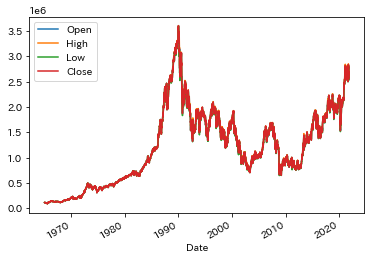

In [20]:
df_new.plot(kind='line')

#### 特徴量の追加

終値の前日比率の追加

In [21]:
df_shift = df.shift(1)

df['Close_ratio'] = (df['Close'] - df_shift['Close']) / df_shift['Close']
df.head()

,weeks,weekday,High,Low,Open,Close,Up,Close_ratio
Date,,,,,,,,
1965-01-05,0,1,116339.097290,116339.097290,116339.097290,116339.097290,1,NaN
1965-01-06,0,2,116919.074097,116919.074097,116919.074097,116919.074097,1,0.004985
1965-01-07,0,3,117869.976807,117869.976807,117869.976807,117869.976807,1,0.008133
1965-01-08,0,4,118994.779968,118994.779968,118994.779968,118994.779968,1,0.009543
1965-01-12,1,1,119189.953613,119189.953613,119189.953613,119189.953613,0,0.001640


始値と終値の差分を追加

In [22]:
df['Body'] = df['Open'] - df['Close']
df.sort_values(by='Body').head()

,weeks,weekday,High,Low,Open,Close,Up,Close_ratio,Body
Date,,,,,,,,,
1990-10-02,1343,1,2.118195e+06,1.870522e+06,1.870522e+06,2.118103e+06,0,0.132359,-247580.947266
1990-03-26,1316,0,2.945245e+06,2.809980e+06,2.809980e+06,2.945245e+06,0,0.048345,-135265.532227
1994-01-31,1517,0,1.871194e+06,1.738147e+06,1.738147e+06,1.871194e+06,1,0.078433,-133046.435547
1990-08-15,1336,2,2.604694e+06,2.471311e+06,2.471311e+06,2.600371e+06,0,0.053973,-129059.541016
1992-04-10,1422,4,1.651186e+06,1.537557e+06,1.537557e+06,1.651186e+06,0,0.075461,-113628.842773


#### 不要なデータの削除

今回は月～木曜までの情報を元に金曜日の始値が上がるか下がるかの予測を行う。
そこで、月～金までのデータが揃っている週のデータのみを利用し、祝日など取引がされていない日がある週はデータとして扱わないようにする。

##### 手順

1. 週番号のリストを作成

2. 同じ週番号を数えてデータフレームに追加

3. 5日分のデータがある週だけを残す

手順①：週番号をリストに格納

In [24]:
list_weeks = []
list_weeks = df['weeks'].unique()
list_weeks

array([   0,    1,    2, ..., 2961, 2962, 2963], dtype=int64)

手順②：各週ごとの日数をfor文を用いて入力する

In [ ]:
df['week_days'] = 0

for i in list_weeks:
    df['week_days'][df['weeks'] == i] = len(df[df['weeks'] == i])
    
df

<ipython-input-24-d73f42e86a50>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['week_days'][df['weeks'] == i] = len(df[df['weeks'] == i])
<ipython-input-24-d73f42e86a50>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['week_days'][df['weeks'] == i] = len(df[df['weeks'] == i])
<ipython-input-24-d73f42e86a50>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['week_days'][df['weeks'] == i] = len(df[df['weeks'] == i])
<ipython-i

<ipython-input-24-d73f42e86a50>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['week_days'][df['weeks'] == i] = len(df[df['weeks'] == i])
<ipython-input-24-d73f42e86a50>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['week_days'][df['weeks'] == i] = len(df[df['weeks'] == i])
<ipython-input-24-d73f42e86a50>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['week_days'][df['weeks'] == i] = len(df[df['weeks'] == i])
<ipython-i

: 

月～金曜までの５日分のデータがある週だけデータを取り出す

In [23]:
df = df[df['week_days'] == 5]
df

KeyError: 'week_days'

金曜日は予測したいデータなのでweekdayが4のデータを削除する

In [ ]:
df = df[df['weekday'] != 4]
df

,weeks,weekday,High,Low,Open,Close,Up,Close_ratio,Body,week_days
Date,,,,,,,,,,
1965-01-18,2,0,1.176304e+05,1.176304e+05,1.176304e+05,1.176304e+05,0,-0.013819,0.000000,5
1965-01-19,2,1,1.175064e+05,1.175064e+05,1.175064e+05,1.175064e+05,0,-0.001054,0.000000,5
1965-01-20,2,2,1.173714e+05,1.173714e+05,1.173714e+05,1.173714e+05,1,-0.001149,0.000000,5
1965-01-21,2,3,1.175175e+05,1.175175e+05,1.175175e+05,1.175175e+05,0,0.001245,0.000000,5
1965-01-25,3,0,1.155991e+05,1.155991e+05,1.155991e+05,1.155991e+05,0,-0.009597,0.000000,5
...,...,...,...,...,...,...,...,...,...,...
2021-10-07,2961,3,2.591398e+06,2.553737e+06,2.559102e+06,2.560235e+06,1,0.005425,-1132.221680,5
2021-10-11,2962,0,2.643776e+06,2.580132e+06,2.587925e+06,2.636083e+06,0,0.016017,-48158.173828,5
2021-10-12,2962,1,2.633371e+06,2.605390e+06,2.632446e+06,2.611331e+06,0,-0.009390,21115.112305,5


並び替えを行う

In [ ]:
df = df[['weekday', 'High', 'Low', 'Open', 'Close', 'Close_ratio', 'Body', 'Up']]
df.head(3)

,weekday,High,Low,Open,Close,Close_ratio,Body,Up
Date,,,,,,,,
1965-01-18,0,117630.404968,117630.404968,117630.404968,117630.404968,-0.013819,0.0,0
1965-01-19,1,117506.446838,117506.446838,117506.446838,117506.446838,-0.001054,0.0,0
1965-01-20,2,117371.400452,117371.400452,117371.400452,117371.400452,-0.001149,0.0,1


### 学習データと検証データに分割

2018年～2020年を学習データ、2021年以降を検証データとする

学習データ作成

In [ ]:
df_train = df['2018-01-01':'2020-12-31']
df_train

,weekday,High,Low,Open,Close,Close_ratio,Body,Up
Date,,,,,,,,
2018-01-15,0,2.204577e+06,2.190864e+06,2.204088e+06,2.193626e+06,0.002581,10461.713867,1
2018-01-16,1,2.216492e+06,2.192419e+06,2.194208e+06,2.215542e+06,0.009991,-21334.257812,0
2018-01-17,2,2.209976e+06,2.195873e+06,2.199966e+06,2.207821e+06,-0.003485,-7855.092773,0
2018-01-18,3,2.227809e+06,2.192201e+06,2.227301e+06,2.198112e+06,-0.004398,29189.350586,1
2018-01-22,0,2.203011e+06,2.192047e+06,2.201300e+06,2.203011e+06,0.000347,-1710.346680,1
...,...,...,...,...,...,...,...,...
2020-12-17,3,2.482982e+06,2.467556e+06,2.473866e+06,2.479617e+06,0.001841,-5750.717773,0
2020-12-21,0,2.488774e+06,2.454361e+06,2.482154e+06,2.471084e+06,-0.001830,11070.371094,0
2020-12-22,1,2.464199e+06,2.438454e+06,2.456738e+06,2.445366e+06,-0.010407,11371.899414,1


検証データ作成

In [ ]:
df_val = df['2021-01-01':]
df_val

,weekday,High,Low,Open,Close,Close_ratio,Body,Up
Date,,,,,,,,
2021-01-04,0,2.553195e+06,2.501415e+06,2.550740e+06,2.521400e+06,-0.006770,29340.024414,0
2021-01-05,1,2.523380e+06,2.504295e+06,2.511503e+06,2.512173e+06,-0.003659,-670.625000,0
2021-01-06,2,2.515667e+06,2.497702e+06,2.507014e+06,2.502674e+06,-0.003781,4339.189453,1
2021-01-07,3,2.555288e+06,2.528993e+06,2.528993e+06,2.542837e+06,0.016048,-13844.467773,1
2021-01-18,0,2.622372e+06,2.600317e+06,2.612078e+06,2.612405e+06,-0.009712,-326.640625,1
...,...,...,...,...,...,...,...,...
2021-10-07,3,2.591398e+06,2.553737e+06,2.559102e+06,2.560235e+06,0.005425,-1132.221680,1
2021-10-11,0,2.643776e+06,2.580132e+06,2.587925e+06,2.636083e+06,0.016017,-48158.173828,0
2021-10-12,1,2.633371e+06,2.605390e+06,2.632446e+06,2.611331e+06,-0.009390,21115.112305,0


学習データを説明変数(X_train)と目的変数(y_train)に分ける

In [ ]:
X_train = df_train[['weekday', 'High', 'Low', 'Open', 'Close', 'Close_ratio', 'Body']]
y_train = df_train['Up']

In [ ]:
X_train.shape

(480, 7)

In [ ]:
y_train.shape

(480,)

検証データを説明変数(X_val)と目的変数(y_val)に分ける

In [ ]:
X_val = df_val[['weekday', 'High', 'Low', 'Open', 'Close', 'Close_ratio', 'Body']]
y_val = df_val['Up']

In [ ]:
X_val.shape

(132, 7)

In [ ]:
y_val.shape

(132,)

学習データと検証データの時系列グラフを作成

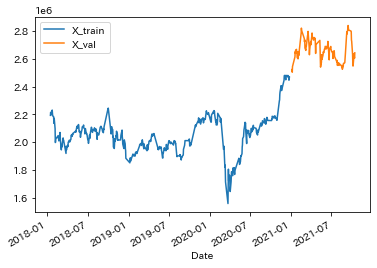

In [ ]:
X_train['Close'].plot(kind='line')
X_val['Close'].plot(kind='line')

plt.legend(['X_train', 'X_val'])

### データを整える

説明変数を各種毎の月曜日から木曜日の４日間をセットとして一つにまとめる。また、目的変数は翌日の金曜日の始値が上がるか下がるかを示す木曜日のデータを抜き出す。
機械学習を行うためには説明変数と目的変数の数を揃える必要がある。

説明変数を抜き出す期間により、株価の金額や変動量が違っている。
例えば、2020年4月頃は株価が16000円程度であったのに対し、12月頃には25000円を超えている。
このように抜き出している期間内において、データの大きさや変動幅が大きく異なっている場合、機械学習では予測が正しく行えない事があるため、このような場合に標準化処理を行う。

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
import numpy as np

4日ごとにデータを抜き出して、標準化とnumpy配列に変換する関数(std_to_np)の定義

In [ ]:
def std_to_np(df):
    df_list = []
    df = np.array(df)
    for i in range(0, len(df) - 3, 4):
        df_s = df[i:i+4]
        scl = StandardScaler()
        df_std = scl.fit_transform(df_s)
        df_list.append(df_std)
    return np.array(df_list)

学習データと検証データの説明変数に関数(std_to_np)を実行

In [ ]:
X_train_np_array = std_to_np(X_train)
X_val_np_array = std_to_np(X_val)

In [ ]:
X_train_np_array.shape

(120, 4, 7)

In [ ]:
X_val_np_array.shape

(33, 4, 7)

#### 目的変数の間引き

週の４日目(木曜日)のデータだけを抜き出す

In [ ]:
y_train.shape

(480,)

In [ ]:
y_train

Date
2018-01-15    1
2018-01-16    0
2018-01-17    0
2018-01-18    1
2018-01-22    1
             ..
2020-12-17    0
2020-12-21    0
2020-12-22    1
2020-12-23    1
2020-12-24    0
Name: Up, Length: 480, dtype: int64

3番目(4行目)から全ての列を4個ずつ取り出す

In [ ]:
y_train[3::4]

Date
2018-01-18    1
2018-01-25    0
2018-02-01    0
2018-02-08    0
2018-02-22    1
             ..
2020-11-19    0
2020-12-03    0
2020-12-10    0
2020-12-17    0
2020-12-24    0
Name: Up, Length: 120, dtype: int64

In [ ]:
y_train_new = y_train[3::4]
y_val_new = y_val[3::4]

In [ ]:
y_train_new.shape

(120,)

In [ ]:
y_val_new.shape

(33,)

### 予測モデルの作成

In [ ]:
!pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4829 sha256=6dc5679283bfa1ca56a4d5cdbc3337a7c7d56c2f0ffaeab88453a7f191f31648
  Stored in directory: c:\users\keita\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 3.10.0
    Uninstalling importlib-metadata-3.10.0:
      Successfully uninstalled importlib-metadata-3.10.0


In [ ]:
# keras.modelsからSequentialのインポート
from keras.models import Sequential
# keras.layersからDense、LSTMのインポート
from keras.layers import Dense, LSTM
# Dropoutのインポート
from keras.layers import Dropout

In [ ]:
# LSTM構築とコンパイル関数
def lstm_comp(df):
    # 入力層/中間層/出力層のネットワークを構築
    model = Sequential()
    model.add(LSTM(256, activation='relu', batch_input_shape=(None, df.shape[1], df.shape[2])))
    model.add(Dropout(0.2))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))

    # ネットワークのコンパイル
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

In [ ]:
# 時系列分割のためTimeSeriesSplitのインポート
from sklearn.model_selection import TimeSeriesSplit
# accuracy算出のためaccuracy_scoreのインポート
from sklearn.metrics import accuracy_score

In [ ]:
valid_scores = []
tscv = TimeSeriesSplit(n_splits=4)

In [ ]:
for fold, (train_indices, valid_indices) in enumerate(tscv.split(X_train_np_array)):
    X_train, X_valid = X_train_np_array[train_indices], X_train_np_array[valid_indices]
    y_train, y_valid = y_train_new[train_indices], y_train_new[valid_indices]

    # LSTM構築とコンパイル関数にX_trainを渡し、変数modelに代入
    model = lstm_comp(X_train)

    # モデル学習
    model.fit(X_train, y_train, epochs=10, batch_size=64)

    # 予測
    y_valid_pred = model.predict(X_valid)

    # 予測結果の2値化
    y_valid_pred = np.where(y_valid_pred < 0.5, 0, 1)

    # 予測精度の算出と表示
    score = accuracy_score(y_valid, y_valid_pred)
    print(f'fold {fold} MAE: {score}')

    # 予測精度スコアをリストに格納
    valid_scores.append(score)

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 0.6876 - accuracy: 0.6667
Epoch 2/10
1/1 [==============================] - 0s 19ms/step - loss: 0.6921 - accuracy: 0.5417
Epoch 3/10
1/1 [==============================] - 0s 14ms/step - loss: 0.6824 - accuracy: 0.5417
Epoch 4/10
1/1 [==============================] - 0s 12ms/step - loss: 0.6792 - accuracy: 0.5417
Epoch 5/10
1/1 [==============================] - 0s 14ms/step - loss: 0.6815 - accuracy: 0.5417
Epoch 6/10
1/1 [==============================] - 0s 14ms/step - loss: 0.6753 - accuracy: 0.5417
Epoch 7/10
1/1 [==============================] - 0s 13ms/step - loss: 0.6736 - accuracy: 0.5417
Epoch 8/10
1/1 [==============================] - 0s 14ms/step - loss: 0.6678 - accuracy: 0.5417
Epoch 9/10
1/1 [==============================] - 0s 11ms/step - loss: 0.6659 - accuracy: 0.5417
Epoch 10/10
1/1 [==============================] - 0s 171ms/step
fold 0 MAE: 0.5
Epoch 1/10
1/1 [==============================] 

In [ ]:
print(f'valid_scores: {valid_scores}')
cv_score = np.mean(valid_scores)
print(f'CV score: {cv_score}')

valid_scores: [0.5, 0.75, 0.5416666666666666, 0.4166666666666667]
CV score: 0.5520833333333333


In [ ]:
# LSTM構築とコンパイル関数にX_train_np_arrayを渡し、変数modelに代入
model = lstm_comp(X_train_np_array)

# モデルの学習の実行
result = model.fit(X_train_np_array, y_train_new, epochs=10, batch_size=64)

Epoch 1/10
2/2 [==============================] - 1s 16ms/step - loss: 0.6941 - accuracy: 0.4500
Epoch 2/10
2/2 [==============================] - 0s 14ms/step - loss: 0.6944 - accuracy: 0.5333
Epoch 3/10
2/2 [==============================] - 0s 14ms/step - loss: 0.6893 - accuracy: 0.5417
Epoch 4/10
2/2 [==============================] - 0s 14ms/step - loss: 0.6893 - accuracy: 0.5083
Epoch 5/10
2/2 [==============================] - 0s 13ms/step - loss: 0.6897 - accuracy: 0.5417
Epoch 6/10
2/2 [==============================] - 0s 17ms/step - loss: 0.6866 - accuracy: 0.5333
Epoch 7/10
2/2 [==============================] - 0s 15ms/step - loss: 0.6840 - accuracy: 0.5833
Epoch 8/10
2/2 [==============================] - 0s 16ms/step - loss: 0.6843 - accuracy: 0.5583
Epoch 9/10
2/2 [==============================] - 0s 14ms/step - loss: 0.6817 - accuracy: 0.6417
Epoch 10/10
2/2 [==============================] - 0s 14ms/step - loss: 0.6806 - accuracy: 0.6000


In [ ]:
pred = model.predict(X_val_np_array)
pred[:10]

2/2 [==============================] - 0s 4ms/step


array([[0.47307763],
       [0.50488466],
       [0.50700957],
       [0.52836674],
       [0.53976005],
       [0.53015363],
       [0.47278586],
       [0.4903066 ],
       [0.45324975],
       [0.5317374 ]], dtype=float32)

In [ ]:
# 予測結果を0もしくは1に修正（0.5を境にして、1に近いほど株価が上昇、0に近いほど株価が上昇しない）
pred = np.where(pred < 0.5, 0, 1)

# 修正した予測結果の先頭10件を確認
pred[:10]

array([[0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1]])

In [ ]:
# 実際の結果から予測値の正解率を計算する
from sklearn.metrics import accuracy_score
print('accuracy = ', accuracy_score(y_true=y_val_new, y_pred=pred))

accuracy =  0.5151515151515151


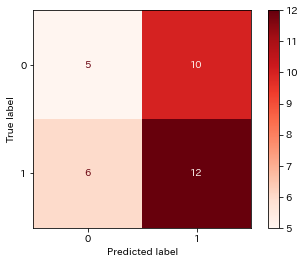

In [ ]:
# 混同行列生成のためconfusion_matrixをインポート
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 混同行列を表示
cm = confusion_matrix(y_val_new, pred)
cmp = ConfusionMatrixDisplay(cm)
cmp.plot(cmap=plt.cm.Reds)